# INF2008 Group P5-1 
# Singapore HDB Resale Price Prediction

## 1. Problem Statement

HDB flats are often labelled as the government's first gift to Singaporeans, leading majority of the population living in them. While many Singaporeans acquire their homes through the Build-to-Order (BTO) scheme, a considerable number of people choose to purchase flats on the resale market due to various reasons.

Throughout the years, it has become a known fact that purchasing a home is often the largest financial decision most people will make, it is essential to ensure that the price paid reflects the property's true value. Overpaying for a flat could lead to significant financial setbacks, sometimes amounting to tens or even hundreds of thousands of dollars.

Determining the right price for a HDB resale flat is complicated, as there are many factors that influence housing prices, giving buyers a hard time in determining the best home for their future. This project aims to tackle the challenge of accurately estimating resale values.

Key Question:
**<center>How can we effectively forecast the resale price of an HDB flat using relevant data?</center>**

This initiative seeks to empower buyers by providing clarity on the factors that drive resale prices, helping them make sound financial decisions when selecting resale flats. To achieve this, a linear regression model will be utilized, with resale price as the outcome variable and key housing-related factors as predictors.

Model performance will be evaluated using the Root Mean Square Error (RMSE), where a smaller RMSE reflects better predictive accuracy.

The project’s primary beneficiaries are home buyers seeking guidance on fair pricing. Additionally, housing agents, who play a critical role in advising buyers, will also find the insights valuable.

# 2. Data Collection

### 2.1 Data Import

Let us start off by importing the combined dataset.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Importing data.
df = pd.read_csv('../dataset/combined_data.csv')

In [4]:
print(df.shape)
df.head(10)

(235565, 11)


month        town flat_type block        street_name storey_range  \
0  2015-01  ANG MO KIO    3 ROOM   174   ANG MO KIO AVE 4     07 TO 09   
1  2015-01  ANG MO KIO    3 ROOM   541  ANG MO KIO AVE 10     01 TO 03   
2  2015-01  ANG MO KIO    3 ROOM   163   ANG MO KIO AVE 4     01 TO 03   
3  2015-01  ANG MO KIO    3 ROOM   446  ANG MO KIO AVE 10     01 TO 03   
4  2015-01  ANG MO KIO    3 ROOM   557  ANG MO KIO AVE 10     07 TO 09   
5  2015-01  ANG MO KIO    3 ROOM   603   ANG MO KIO AVE 5     07 TO 09   
6  2015-01  ANG MO KIO    3 ROOM   709   ANG MO KIO AVE 8     01 TO 03   
7  2015-01  ANG MO KIO    3 ROOM   333   ANG MO KIO AVE 1     01 TO 03   
8  2015-01  ANG MO KIO    3 ROOM   109   ANG MO KIO AVE 4     01 TO 03   
9  2015-01  ANG MO KIO    3 ROOM   564   ANG MO KIO AVE 3     13 TO 15   

   floor_area_sqm      flat_model  lease_commence_date remaining_lease  \
0            60.0        Improved                 1986              70   
1            68.0  New Generation                 1981              65   
2            69.0  New Generation                 1980              64   
3            68.0  New Generation                 1979              63   
4            68.0  New Generation                 1980              64   
5            67.0  New Generation                 1980              64   
6            68.0  New Generation                 1980              64   
7            68.0  New Generation                 1981              65   
8            67.0  New Generation                 1978              62   
9            68.0  New Generation                 1985              69   

   resale_price  
0      255000.0  
1      275000.0  
2      285000.0  
3      290000.0  
4      290000.0  
5      290000.0  
6      290000.0  
7      293000.0  
8      300000.0  
9      307500.0

As shown above, we have a total of up to 235,565 datasets with 11 columns, now we will walk through the data cleaning process.

### 2.2 Handling Duplicate Values

In [5]:
df.duplicated().sum()

321

In [6]:
df[df.duplicated()]

month             town flat_type block         street_name  \
661     2015-01  KALLANG/WHAMPOA    3 ROOM    57       GEYLANG BAHRU   
2166    2015-02         TAMPINES    3 ROOM   403      TAMPINES ST 41   
3896    2015-04            BEDOK    4 ROOM   701  BEDOK RESERVOIR RD   
4246    2015-04         CLEMENTI    3 ROOM   714  CLEMENTI WEST ST 2   
5493    2015-05            BEDOK    3 ROOM   409     BEDOK NTH AVE 2   
...         ...              ...       ...   ...                 ...   
225347  2024-10         SENGKANG    4 ROOM  329B       ANCHORVALE ST   
226620  2024-05         SENGKANG    5 ROOM  430D       FERNVALE LINK   
228223  2024-12         TAMPINES    4 ROOM  612A   TAMPINES NTH DR 1   
233098  2024-01           YISHUN    4 ROOM  462C        YISHUN AVE 6   
234582  2025-01          GEYLANG    4 ROOM   82B          CIRCUIT RD   

       storey_range  floor_area_sqm      flat_model  lease_commence_date  \
661        16 TO 18            65.0        Improved                 1974   
2166       07 TO 09            69.0        Improved                 1985   
3896       10 TO 12            93.0  New Generation                 1980   
4246       10 TO 12            67.0  New Generation                 1980   
5493       07 TO 09            68.0  New Generation                 1980   
...             ...             ...             ...                  ...   
225347     10 TO 12            93.0         Model A                 2015   
226620     19 TO 21           112.0        Improved                 2015   
228223     10 TO 12            93.0         Model A                 2020   
233098     01 TO 03            93.0         Model A                 2019   
234582     19 TO 21            93.0         Model A                 2020   

           remaining_lease  resale_price  
661                     58      315000.0  
2166                    69      350000.0  
3896                    64      400000.0  
4246                    64      300000.0  
5493                    63      340000.0  
...                    ...           ...  
225347  89 years 11 months      695000.0  
226620   90 years 01 month      770000.0  
228223  94 years 11 months      780000.0  
233098  94 years 08 months      530000.0  
234582  94 years 05 months     1018000.0  

[321 rows x 11 columns]

As reflected, we have identified 321 rows x 11 columns of duplicated data, now let us drop the duplicated data.

In [7]:
df = df.drop_duplicates()

Due to the combination of datasets, we have identified that the remaining_lease columns are not consistent in terms of the units defined. Therefore, we decided to normalise them in years format.

In [8]:
# Calculate remaining lease using lease commence date
current_year = 2025  # Replace with the relevant current year
df['remaining_lease'] = 99 - (current_year - df['lease_commence_date'])

# Ensure no negative values (clip to 0 for expired leases)
df['remaining_lease'] = df['remaining_lease'].clip(lower=0)


In [9]:
df.tail(10) #The last 10 rows

month    town  flat_type block     street_name storey_range  \
235555  2025-01  YISHUN     5 ROOM   238  YISHUN RING RD     01 TO 03   
235556  2025-01  YISHUN     5 ROOM   109  YISHUN RING RD     07 TO 09   
235557  2025-01  YISHUN     5 ROOM   297    YISHUN ST 20     01 TO 03   
235558  2025-01  YISHUN     5 ROOM   265    YISHUN ST 22     01 TO 03   
235559  2025-01  YISHUN     5 ROOM  511B    YISHUN ST 51     10 TO 12   
235560  2025-01  YISHUN     5 ROOM  502B    YISHUN ST 51     07 TO 09   
235561  2025-01  YISHUN     5 ROOM   871    YISHUN ST 81     07 TO 09   
235562  2025-01  YISHUN     5 ROOM   851    YISHUN ST 81     10 TO 12   
235563  2025-01  YISHUN  EXECUTIVE   352  YISHUN RING RD     04 TO 06   
235564  2025-01  YISHUN  EXECUTIVE   614    YISHUN ST 61     04 TO 06   

        floor_area_sqm  flat_model  lease_commence_date  remaining_lease  \
235555           127.0    Improved                 1985               59   
235556           121.0    Improved                 1982               56   
235557           111.0    Improved                 2000               74   
235558           122.0    Improved                 1986               60   
235559           113.0    Improved                 2017               91   
235560           112.0    Improved                 2018               92   
235561           122.0    Improved                 1988               62   
235562           127.0    Improved                 1988               62   
235563           146.0  Maisonette                 1988               62   
235564           146.0  Maisonette                 1987               61   

        resale_price  
235555      650000.0  
235556      695000.0  
235557      608000.0  
235558      625000.0  
235559      730000.0  
235560      776000.0  
235561      738000.0  
235562      740000.0  
235563     1008000.0  
235564      800000.0

Using this example, this is to illustrate the changes made for remaining_lease on the second half of the dataset from years and months into years only.

In [10]:
# Looking for columns with null values
df.isnull().sum()[df.isnull().sum() > 0]

Series([], dtype: int64)

As shown above, we have detected no null values within the dataset.

### 2.3 Handling Data Types

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 235244 entries, 0 to 235564
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                235244 non-null  object 
 1   town                 235244 non-null  object 
 2   flat_type            235244 non-null  object 
 3   block                235244 non-null  object 
 4   street_name          235244 non-null  object 
 5   storey_range         235244 non-null  object 
 6   floor_area_sqm       235244 non-null  float64
 7   flat_model           235244 non-null  object 
 8   lease_commence_date  235244 non-null  int64  
 9   remaining_lease      235244 non-null  int64  
 10  resale_price         235244 non-null  float64
dtypes: float64(2), int64(2), object(7)
memory usage: 21.5+ MB


# 3 Data Analysis

### 3.1 Distribution of Dependent Variables

In [12]:
df['resale_price'].describe()

count    2.352440e+05
mean     4.977054e+05
std      1.741972e+05
min      1.400000e+05
25%      3.700000e+05
50%      4.638880e+05
75%      5.950000e+05
max      1.600000e+06
Name: resale_price, dtype: float64

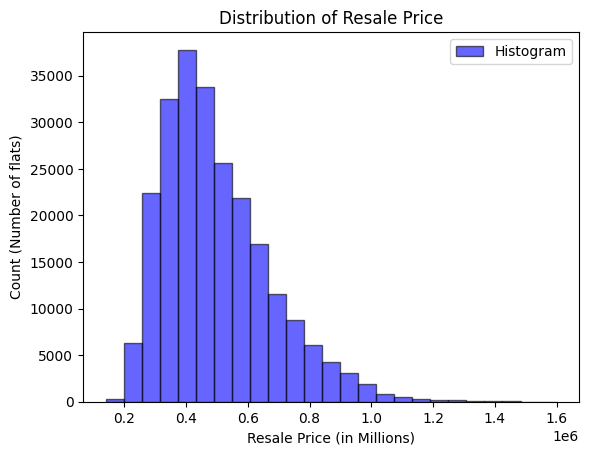

In [13]:

# Create histogram
data = df['resale_price']
plt.hist(data, bins=25, alpha=0.6, color='b', edgecolor='black', label='Histogram')

# Add titles and labels
plt.title('Distribution of Resale Price')
plt.xlabel('Resale Price (in Millions)')
plt.ylabel('Count (Number of flats)')

# Add legend
plt.legend()

# Show plot
plt.show()

Interpretation: The resale price distribution is slightly left-skewed, with the majority of flats priced in the lower range. However, the tail extends toward higher prices, indicating the presence of some higher-value properties, which aligns with the trends observed in the summary statistics.

Let us get a better understanding of our resale price by breaking it across features.

C:\Windows\Temp\ipykernel_21192\4212493500.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


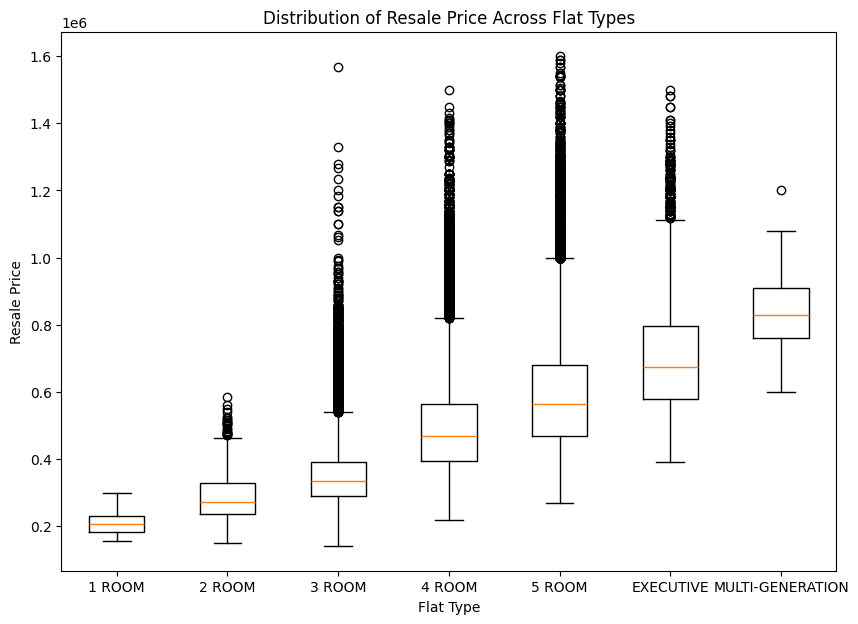

In [14]:
# Define flat type order
flat_type_order = ['1 ROOM', '2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE', 'MULTI-GENERATION']

# Reorder the data to follow the specified flat type order
df['flat_type'] = pd.Categorical(df['flat_type'], categories=flat_type_order, ordered=True)
df = df.sort_values('flat_type')

# Create the boxplot
plt.figure(figsize=(10, 7))
plt.boxplot(
    [df.loc[df['flat_type'] == flat_type, 'resale_price'] for flat_type in flat_type_order],
    labels=flat_type_order
)

# Add title and labels
plt.title('Distribution of Resale Price Across Flat Types')
plt.xlabel('Flat Type')
plt.ylabel('Resale Price')

# Show the plot
plt.show()

Larger flat types generally have higher resale prices, with 1 ROOM and 2 ROOM flats being the cheapest and EXECUTIVE and MULTI-GENERATION flats being the most expensive. Smaller flats have more consistent prices, while larger ones show more variation and include higher-priced outliers. Some 5 ROOM and EXECUTIVE flats are priced over $1.5 million, likely due to premium locations or features.

C:\Windows\Temp\ipykernel_21192\3469271478.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, vert=False, labels=towns)


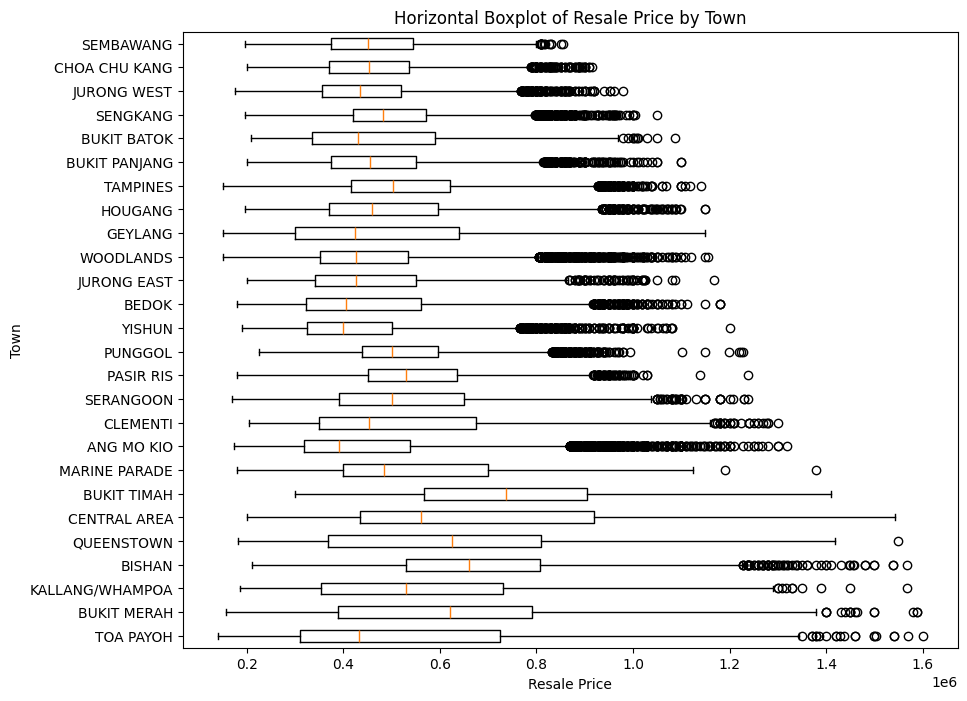

In [15]:
# Sort the DataFrame by resale_price
sorted_df = df.sort_values(by='resale_price', ascending=False)

# Get unique towns
towns = sorted_df['town'].unique()

# Prepare data for the boxplot
data = [sorted_df.loc[sorted_df['town'] == town, 'resale_price'] for town in towns]

# Create the horizontal boxplot
plt.figure(figsize=(10, 8))
plt.boxplot(data, vert=False, labels=towns)

# Add labels and title
plt.xlabel('Resale Price')  # Set the x-axis label
plt.ylabel('Town')  # Set the y-axis label
plt.title('Horizontal Boxplot of Resale Price by Town')  # Set the title

# Show the plot
plt.show()

Interpretation: Resale prices vary a lot depending on the location and nearby facilities. Central towns like Bukit Timah, Queenstown, and Central Area are more expensive because they’re closer to the city, well-connected, and have more amenities. Suburban towns like Sembawang and Choa Chu Kang are cheaper since they’re farther from the city and less developed. Prices can also go up in towns near MRT stations, good schools, or malls. The high-priced outliers in some towns might be due to unique features or very desirable locations.

## 3.2 Scatterplots of Strongest Independent Varables against Dependent Variables

### 3.2.1 Relationship between Floor Area and Resale Price

In [19]:
import plotly.express as px
import nbformat


scatterplt = px.scatter(
    df,
    x='floor_area_sqm',
    y='resale_price',
    color='flat_type',  # Optional: Add this for color differentiation
    title='Relationship Between Floor Area and Resale Price',
    width=900,
    height=800
)

scatterplt.show()



Interpretation: The scatterplot reveals a clear positive relationship between floor area and resale price, indicating that larger flats tend to have higher resale prices. Smaller flats, such as 1 ROOM and 2 ROOM, are concentrated in the lower left of the plot, with smaller floor areas and lower resale prices. In contrast, larger flats like EXECUTIVE and MULTI-GENERATION are positioned in the upper right, reflecting their bigger floor areas and significantly higher prices. Each flat type forms distinct clusters, suggesting that floor area strongly correlates with both the flat type and its price. However, there are some outliers, where certain flats have much higher prices than expected for their size, likely due to other factors such as location, condition, or special features. Overall, the plot highlights that while larger floor areas generally lead to higher prices, other variables also play a role in determining resale value.